In [48]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [50]:
from pandas_datareader import data

In [51]:
from datetime import datetime

In [52]:
from __future__ import division

In [53]:
tech_list = ['APPL','GOOG','MSFT','AMZN']

In [54]:
end= datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [55]:
apple_df = pd.read_csv('Desktop/AAPL.csv')

In [56]:
apple_df = apple_df.set_index('Date')

In [57]:
apple_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,171.968063,173.342174,170.636167,172.008617,170.953235,2.961087e+07
std,11.733093,11.700918,11.863552,11.814054,12.421762,1.250389e+07
min,149.100006,150.220001,147.300003,148.729996,146.453400,1.251390e+07
25%,161.940002,163.600006,160.000000,161.600006,159.751297,2.077880e+07
50%,172.399994,173.699997,171.179993,172.259995,170.911438,2.629980e+07
75%,179.100006,180.479996,178.070007,179.100006,177.963745,3.502630e+07
max,194.990005,195.960007,193.610001,194.820007,194.820007,8.659380e+07


In [58]:
apple_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-27,153.750000,153.990005,147.300003,150.559998,148.255402,32476300
2017-07-28,149.889999,150.229996,149.190002,149.500000,147.211624,17213700
2017-07-31,149.899994,150.330002,148.130005,148.729996,146.453400,19845900
2017-08-01,149.100006,150.220001,148.410004,150.050003,147.753204,35368600
2017-08-02,159.279999,159.750000,156.160004,157.139999,154.734665,69936800


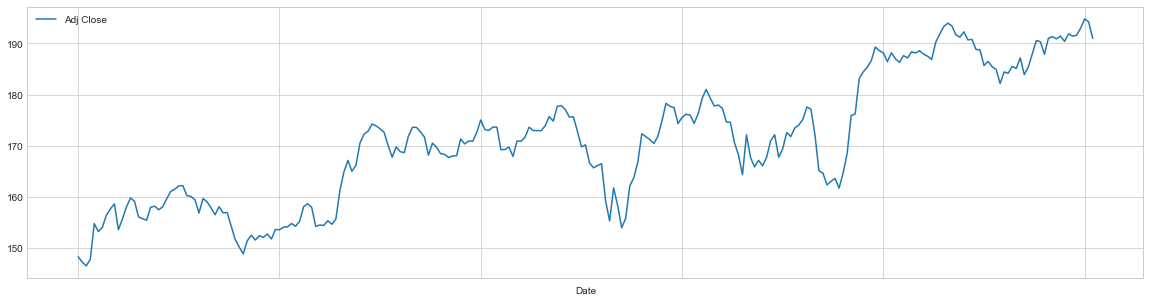

In [59]:
apple_df['Adj Close'].plot(legend = True,figsize = (20,5))

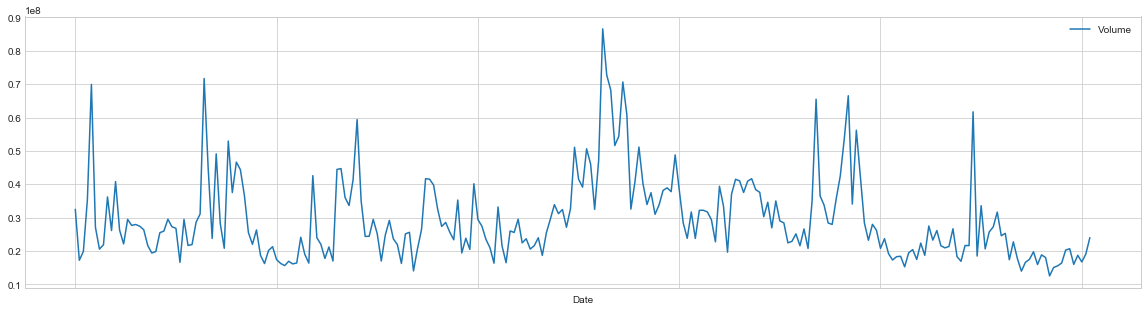

In [60]:
apple_df['Volume'].plot(legend = True,figsize = (20,5),kind = 'line')

In [61]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    apple_df[column_name] = pd.rolling_mean(apple_df['Adj Close'],ma)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  


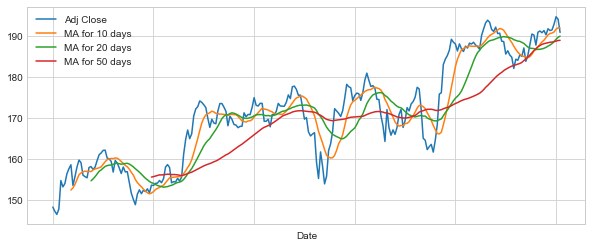

In [34]:
apple_df[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize = (10,4))

Text(0.5,1,u'MA for 10 days')

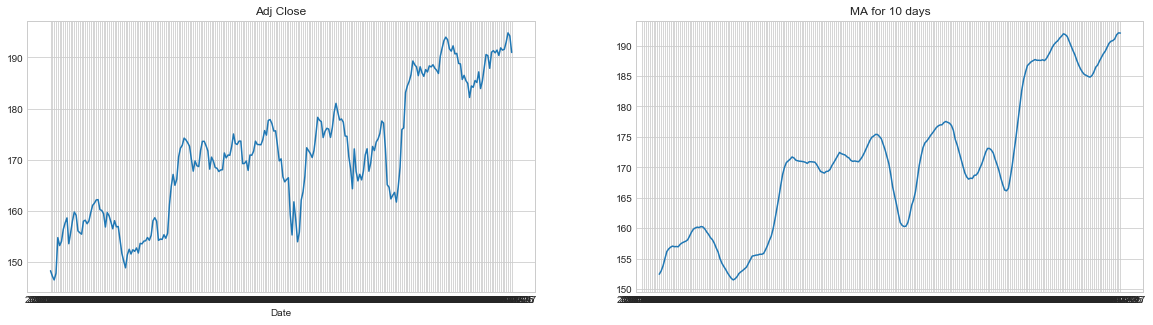

In [62]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
ax[0].plot('Adj Close',data = apple_df)
ax[0].set_xlabel('Date')
ax[1].plot('MA for 10 days',data = apple_df)
ax[0].set_title('Adj Close')
ax[1].set_title('MA for 10 days')


In [63]:
apple_df['Daily Return'] = apple_df['Adj Close'].pct_change()

In [64]:

apple_df.head()


,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2017-07-27,153.750000,153.990005,147.300003,150.559998,148.255402,32476300,NaN,NaN,NaN,NaN
2017-07-28,149.889999,150.229996,149.190002,149.500000,147.211624,17213700,NaN,NaN,NaN,-0.007040
2017-07-31,149.899994,150.330002,148.130005,148.729996,146.453400,19845900,NaN,NaN,NaN,-0.005151
2017-08-01,149.100006,150.220001,148.410004,150.050003,147.753204,35368600,NaN,NaN,NaN,0.008875
2017-08-02,159.279999,159.750000,156.160004,157.139999,154.734665,69936800,NaN,NaN,NaN,0.047251


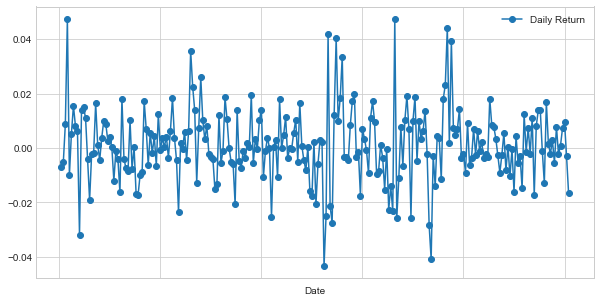

In [65]:
apple_df['Daily Return'].plot(figsize = (10,5),legend = True,marker = 'o')

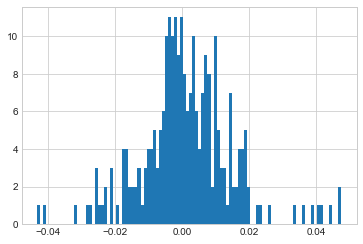

In [66]:
apple_df['Daily Return'].hist(bins =100)

ValueError: Could not interpret input 'Daily Return'

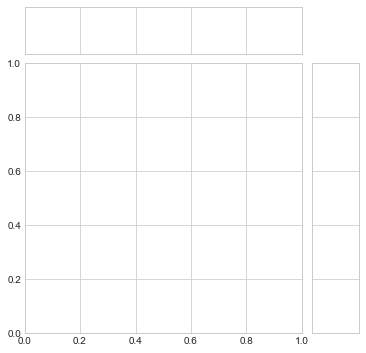

In [47]:
sns.jointplot('Daily Return','Daily Return',data = apple_df,kind = 'scatter')

In [67]:
sns.kdeplot('Adj Close',data = apple_df)

TypeError: kdeplot() got multiple values for keyword argument 'data'